- Protected attribute (S) is binary, so we replace all values that aren't AA to 1 value. Ex. AA = 0, the rest = 1

In [1]:
import pandas as pd
pd.set_option('display.max_columns', None)

raw_scores = pd.read_csv("compas-scores-raw.csv")

display(raw_scores)

,Person_ID,AssessmentID,Case_ID,Agency_Text,LastName,FirstName,MiddleName,Sex_Code_Text,Ethnic_Code_Text,DateOfBirth,ScaleSet_ID,ScaleSet,AssessmentReason,Language,LegalStatus,CustodyStatus,MaritalStatus,Screening_Date,RecSupervisionLevel,RecSupervisionLevelText,Scale_ID,DisplayText,RawScore,DecileScore,ScoreText,AssessmentType,IsCompleted,IsDeleted
0,50844,57167,51950,PRETRIAL,Fisher,Kevin,NaN,Male,Caucasian,12/05/92,22,Risk and Prescreen,Intake,English,Pretrial,Jail Inmate,Single,1/1/13 0:00,1,Low,7,Risk of Violence,-2.08,4,Low,New,1,0
1,50844,57167,51950,PRETRIAL,Fisher,Kevin,NaN,Male,Caucasian,12/05/92,22,Risk and Prescreen,Intake,English,Pretrial,Jail Inmate,Single,1/1/13 0:00,1,Low,8,Risk of Recidivism,-1.06,2,Low,New,1,0
2,50844,57167,51950,PRETRIAL,Fisher,Kevin,NaN,Male,Caucasian,12/05/92,22,Risk and Prescreen,Intake,English,Pretrial,Jail Inmate,Single,1/1/13 0:00,1,Low,18,Risk of Failure to Appear,15.00,1,Low,New,1,0
3,50848,57174,51956,PRETRIAL,KENDALL,KEVIN,NaN,Male,Caucasian,09/16/84,22,Risk and Prescreen,Intake,English,Pretrial,Jail Inmate,Married,1/1/13 0:00,1,Low,7,Risk of Violence,-2.84,2,Low,New,1,0
4,50848,57174,51956,PRETRIAL,KENDALL,KEVIN,NaN,Male,Caucasian,09/16/84,22,Risk and Prescreen,Intake,English,Pretrial,Jail Inmate,Married,1/1/13 0:00,1,Low,8,Risk of Recidivism,-1.50,1,Low,New,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60838,65667,79665,72038,Probation,West,James,NaN,Male,African-American,06/21/64,22,Risk and Prescreen,Intake,English,Pretrial,Jail Inmate,Single,12/31/14 0:00,3,Medium with Override Consideration,8,Risk of Recidivism,0.16,8,High,New,1,0
60839,65667,79665,72038,Probation,West,James,NaN,Male,African-American,06/21/64,22,Risk and Prescreen,Intake,English,Pretrial,Jail Inmate,Single,12/31/14 0:00,3,Medium with Override Consideration,18,Risk of Failure to Appear,35.00,10,High,New,1,0
60840,68603,79669,72042,PRETRIAL,Ryan,Michael,NaN,Male,Caucasian,02/06/85,22,Risk and Prescreen,Intake,English,Pretrial,Jail Inmate,Single,12/31/14 0:00,1,Low,7,Risk of Violence,-2.75,2,Low,New,1,0
60841,68603,79669,72042,PRETRIAL,Ryan,Michael,NaN,Male,Caucasian,02/06/85,22,Risk and Prescreen,Intake,English,Pretrial,Jail Inmate,Single,12/31/14 0:00,1,Low,8,Risk of Recidivism,-0.34,5,Medium,New,1,0


In [2]:
RFA = raw_scores[raw_scores["DisplayText"] == "Risk of Failure to Appear"].index
ROV = raw_scores[raw_scores["DisplayText"] == "Risk of Violence"].index

raw_scores.drop(RFA, inplace=True)
raw_scores.drop(ROV, inplace=True)

In [3]:
raw_scores = raw_scores.dropna(subset=['ScoreText'], axis=0, how='any')
display(raw_scores)

,Person_ID,AssessmentID,Case_ID,Agency_Text,LastName,FirstName,MiddleName,Sex_Code_Text,Ethnic_Code_Text,DateOfBirth,ScaleSet_ID,ScaleSet,AssessmentReason,Language,LegalStatus,CustodyStatus,MaritalStatus,Screening_Date,RecSupervisionLevel,RecSupervisionLevelText,Scale_ID,DisplayText,RawScore,DecileScore,ScoreText,AssessmentType,IsCompleted,IsDeleted
1,50844,57167,51950,PRETRIAL,Fisher,Kevin,NaN,Male,Caucasian,12/05/92,22,Risk and Prescreen,Intake,English,Pretrial,Jail Inmate,Single,1/1/13 0:00,1,Low,8,Risk of Recidivism,-1.06,2,Low,New,1,0
4,50848,57174,51956,PRETRIAL,KENDALL,KEVIN,NaN,Male,Caucasian,09/16/84,22,Risk and Prescreen,Intake,English,Pretrial,Jail Inmate,Married,1/1/13 0:00,1,Low,8,Risk of Recidivism,-1.50,1,Low,New,1,0
7,50855,57181,51963,PRETRIAL,DAYES,DANIEL,NaN,Male,African-American,08/25/94,22,Risk and Prescreen,Intake,English,Pretrial,Jail Inmate,Single,1/1/13 0:00,4,High,8,Risk of Recidivism,0.18,8,High,New,1,0
10,50850,57176,51958,PRETRIAL,Debe,Mikerlie,George,Female,African-American,10/09/94,22,Risk and Prescreen,Intake,English,Pretrial,Jail Inmate,Significant Other,1/1/13 0:00,2,Medium,8,Risk of Recidivism,-0.53,6,Medium,New,1,0
13,50839,57162,51945,PRETRIAL,McLaurin,Stephanie,Nicole,Female,African-American,06/29/85,22,Risk and Prescreen,Intake,English,Pretrial,Jail Inmate,Single,1/1/13 0:00,1,Low,8,Risk of Recidivism,-1.55,2,Low,New,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60829,68595,79656,72031,PRETRIAL,PENA,ROLANDO,N,Male,Hispanic,06/13/85,22,Risk and Prescreen,Intake,English,Pretrial,Jail Inmate,Single,12/31/14 0:00,2,Medium,8,Risk of Recidivism,-0.42,5,Medium,New,1,0
60832,19968,39866,36500,PRETRIAL,BUTTERFIELD,JAMES,MICHAEL,Male,Caucasian,09/24/73,22,Risk and Prescreen,Intake,English,Post Sentence,Probation,Single,12/31/14 0:00,1,Low,8,Risk of Recidivism,-0.36,5,Medium,New,1,0
60835,68598,79660,72035,PRETRIAL,SUAREZ,ANDERSON,NaN,Male,Caucasian,08/10/81,22,Risk and Prescreen,Intake,English,Pretrial,Jail Inmate,Single,12/31/14 0:00,1,Low,8,Risk of Recidivism,-1.57,1,Low,New,1,0
60838,65667,79665,72038,Probation,West,James,NaN,Male,African-American,06/21/64,22,Risk and Prescreen,Intake,English,Pretrial,Jail Inmate,Single,12/31/14 0:00,3,Medium with Override Consideration,8,Risk of Recidivism,0.16,8,High,New,1,0


In [4]:
"""compas_target = raw_scores['ScoreText'] 
display(compas_target)"""

"compas_target = raw_scores['ScoreText'] \ndisplay(compas_target)"

In [5]:
x_compas = raw_scores.drop(columns=["DateOfBirth", "Scale_ID", "Screening_Date", "ScaleSet_ID", "RecSupervisionLevel", "DecileScore", "LastName", "FirstName", "MiddleName", "DisplayText", "IsCompleted", "IsDeleted", "AssessmentID", "Case_ID", "RawScore"])

#for now ScoreText is not dropped yet (so it's still in the data since we equalize groups)!!

display(x_compas)

,Person_ID,Agency_Text,Sex_Code_Text,Ethnic_Code_Text,ScaleSet,AssessmentReason,Language,LegalStatus,CustodyStatus,MaritalStatus,RecSupervisionLevelText,ScoreText,AssessmentType
1,50844,PRETRIAL,Male,Caucasian,Risk and Prescreen,Intake,English,Pretrial,Jail Inmate,Single,Low,Low,New
4,50848,PRETRIAL,Male,Caucasian,Risk and Prescreen,Intake,English,Pretrial,Jail Inmate,Married,Low,Low,New
7,50855,PRETRIAL,Male,African-American,Risk and Prescreen,Intake,English,Pretrial,Jail Inmate,Single,High,High,New
10,50850,PRETRIAL,Female,African-American,Risk and Prescreen,Intake,English,Pretrial,Jail Inmate,Significant Other,Medium,Medium,New
13,50839,PRETRIAL,Female,African-American,Risk and Prescreen,Intake,English,Pretrial,Jail Inmate,Single,Low,Low,New
...,...,...,...,...,...,...,...,...,...,...,...,...,...
60829,68595,PRETRIAL,Male,Hispanic,Risk and Prescreen,Intake,English,Pretrial,Jail Inmate,Single,Medium,Medium,New
60832,19968,PRETRIAL,Male,Caucasian,Risk and Prescreen,Intake,English,Post Sentence,Probation,Single,Low,Medium,New
60835,68598,PRETRIAL,Male,Caucasian,Risk and Prescreen,Intake,English,Pretrial,Jail Inmate,Single,Low,Low,New
60838,65667,Probation,Male,African-American,Risk and Prescreen,Intake,English,Pretrial,Jail Inmate,Single,Medium with Override Consideration,High,New


In [6]:
cleanup_nums_fair = {"Agency_Text": {"PRETRIAL":1, "Probation":2, "DRRD":3, "Broward County":4},
                "Sex_Code_Text": {"Male":1, "Female":2},
                "Ethnic_Code_Text": {"African-American":1, "African-Am":1, "Caucasian":2, "Hispanic":2, "Asian":2, "Native American":2, "Arabic":2, "Oriental":2, "Other":2},
                "ScaleSet": {"Risk and Prescreen":1, "All Scales":2},
                "AssessmentReason": {"Intake":1},
                "Language": {"English":1, "Spanish":2},
                "LegalStatus": {"Pretrial":1, "Post Sentence":2, "Conditional Release":3, "Probation Violator":4, "Parole Violator":5, "Deferred Sentencing":6, "Other":7},
                "CustodyStatus": {"Jail Inmate":1, "Probation":2, "Pretrial Defendant":3, "Residential Program":4, "Parole":5, "Prison Inmate":6},
                "MaritalStatus": {"Single":1, "Married":2, "Divorced":3, "Separated":4, "Significant Other":5, "Widowed":6, "Unknown":7},
                "RecSupervisionLevelText": {"Low":1, "Medium":2, "Medium with Override Consideration":3, "High":4},
                "AssessmentType": {"New":1, "Copy":2}}

x_compas = x_compas.replace(cleanup_nums_fair)
display(x_compas)


,Person_ID,Agency_Text,Sex_Code_Text,Ethnic_Code_Text,ScaleSet,AssessmentReason,Language,LegalStatus,CustodyStatus,MaritalStatus,RecSupervisionLevelText,ScoreText,AssessmentType
1,50844,1,1,2,1,1,1,1,1,1,1,Low,1
4,50848,1,1,2,1,1,1,1,1,2,1,Low,1
7,50855,1,1,1,1,1,1,1,1,1,4,High,1
10,50850,1,2,1,1,1,1,1,1,5,2,Medium,1
13,50839,1,2,1,1,1,1,1,1,1,1,Low,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
60829,68595,1,1,2,1,1,1,1,1,1,2,Medium,1
60832,19968,1,1,2,1,1,1,2,2,1,1,Medium,1
60835,68598,1,1,2,1,1,1,1,1,1,1,Low,1
60838,65667,2,1,1,1,1,1,1,1,1,3,High,1


In [7]:
x_compas["Ethnic_Code_Text"].value_counts()

2    11235
1     9010
Name: Ethnic_Code_Text, dtype: int64

# Fair Approach

In [8]:
x_compas_other = x_compas[x_compas["Ethnic_Code_Text"] == 2]

In [9]:
x_compas_other_sample = x_compas_other.sample(n=9010)
display(x_compas_other)
display(x_compas_other_sample)

,Person_ID,Agency_Text,Sex_Code_Text,Ethnic_Code_Text,ScaleSet,AssessmentReason,Language,LegalStatus,CustodyStatus,MaritalStatus,RecSupervisionLevelText,ScoreText,AssessmentType
1,50844,1,1,2,1,1,1,1,1,1,1,Low,1
4,50848,1,1,2,1,1,1,1,1,2,1,Low,1
16,50852,1,1,2,1,1,1,1,1,1,3,High,1
19,50840,1,2,2,1,1,1,1,1,1,1,Low,1
25,50847,1,1,2,1,1,1,1,1,2,1,Low,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
60826,68608,1,1,2,1,1,1,1,1,1,1,Medium,1
60829,68595,1,1,2,1,1,1,1,1,1,2,Medium,1
60832,19968,1,1,2,1,1,1,2,2,1,1,Medium,1
60835,68598,1,1,2,1,1,1,1,1,1,1,Low,1


,Person_ID,Agency_Text,Sex_Code_Text,Ethnic_Code_Text,ScaleSet,AssessmentReason,Language,LegalStatus,CustodyStatus,MaritalStatus,RecSupervisionLevelText,ScoreText,AssessmentType
55837,57499,1,2,2,1,1,1,2,2,1,2,Medium,2
45979,64151,1,1,2,1,1,1,1,1,1,1,Low,1
4243,52086,2,1,2,1,1,1,7,2,2,1,Low,1
47890,64727,1,1,2,1,1,1,1,3,1,1,Medium,1
22834,57367,1,2,2,1,1,1,1,3,1,4,High,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
60739,39209,1,1,2,1,1,1,1,1,1,1,Low,1
8947,53390,1,1,2,1,1,1,1,1,1,2,Medium,1
11203,54079,1,2,2,1,1,1,1,1,2,1,Low,1
32890,60353,1,1,2,1,1,1,1,1,1,3,High,1


In [10]:
CO = x_compas_other.index
x_compas.drop(CO, inplace=True)

display(x_compas)

,Person_ID,Agency_Text,Sex_Code_Text,Ethnic_Code_Text,ScaleSet,AssessmentReason,Language,LegalStatus,CustodyStatus,MaritalStatus,RecSupervisionLevelText,ScoreText,AssessmentType
7,50855,1,1,1,1,1,1,1,1,1,4,High,1
10,50850,1,2,1,1,1,1,1,1,5,2,Medium,1
13,50839,1,2,1,1,1,1,1,1,1,1,Low,1
22,50853,1,1,1,1,1,1,1,1,1,3,High,1
31,50843,1,1,1,1,1,1,1,1,1,3,Medium,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
60805,62296,1,1,1,1,1,1,1,1,1,1,Low,1
60808,45932,1,1,1,1,1,1,1,3,1,3,High,2
60811,24873,1,1,1,1,1,1,1,1,1,4,High,2
60817,44498,1,1,1,2,1,1,2,2,1,3,High,2


In [11]:
x_compas_new = pd.concat([x_compas, x_compas_other_sample])
display(x_compas_new)

,Person_ID,Agency_Text,Sex_Code_Text,Ethnic_Code_Text,ScaleSet,AssessmentReason,Language,LegalStatus,CustodyStatus,MaritalStatus,RecSupervisionLevelText,ScoreText,AssessmentType
7,50855,1,1,1,1,1,1,1,1,1,4,High,1
10,50850,1,2,1,1,1,1,1,1,5,2,Medium,1
13,50839,1,2,1,1,1,1,1,1,1,1,Low,1
22,50853,1,1,1,1,1,1,1,1,1,3,High,1
31,50843,1,1,1,1,1,1,1,1,1,3,Medium,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
60739,39209,1,1,2,1,1,1,1,1,1,1,Low,1
8947,53390,1,1,2,1,1,1,1,1,1,2,Medium,1
11203,54079,1,2,2,1,1,1,1,1,2,1,Low,1
32890,60353,1,1,2,1,1,1,1,1,1,3,High,1


In [12]:
x_compas_new["MaritalStatus"].value_counts()

1    13550
2     2356
3     1057
4      519
5      362
6      113
7       63
Name: MaritalStatus, dtype: int64

9010 * 2 = 18,020 (so, it's correct)

In [13]:
compas_target_new = x_compas_new['ScoreText'] 
display(compas_target_new)

7          High
10       Medium
13          Low
22         High
31       Medium
          ...  
60739       Low
8947     Medium
11203       Low
32890      High
50395       Low
Name: ScoreText, Length: 18020, dtype: object

In [14]:
x_compas_new2 = x_compas_new.drop(columns=["ScoreText"])
display(x_compas_new2)

,Person_ID,Agency_Text,Sex_Code_Text,Ethnic_Code_Text,ScaleSet,AssessmentReason,Language,LegalStatus,CustodyStatus,MaritalStatus,RecSupervisionLevelText,AssessmentType
7,50855,1,1,1,1,1,1,1,1,1,4,1
10,50850,1,2,1,1,1,1,1,1,5,2,1
13,50839,1,2,1,1,1,1,1,1,1,1,1
22,50853,1,1,1,1,1,1,1,1,1,3,1
31,50843,1,1,1,1,1,1,1,1,1,3,1
...,...,...,...,...,...,...,...,...,...,...,...,...
60739,39209,1,1,2,1,1,1,1,1,1,1,1
8947,53390,1,1,2,1,1,1,1,1,1,2,1
11203,54079,1,2,2,1,1,1,1,1,2,1,1
32890,60353,1,1,2,1,1,1,1,1,1,3,1


In [15]:
pd.crosstab(x_compas_new.ScoreText, x_compas_new.Ethnic_Code_Text)

Ethnic_Code_Text,1,2
ScoreText,,
High,2534,882
Low,3766,6309
Medium,2710,1819


In [16]:
pd.crosstab(x_compas_new.ScoreText, x_compas_new.MaritalStatus)

MaritalStatus,1,2,3,4,5,6,7
ScoreText,,,,,,,
High,3122,143,47,36,55,8,5
Low,6529,1938,877,397,208,85,41
Medium,3899,275,133,86,99,20,17


# And the other steps

In [17]:
#train test split - import 
from sklearn.model_selection import train_test_split as tts

x, x_test, y, y_test = tts(x_compas_new2, compas_target_new, test_size=0.20, train_size=0.80, random_state=33)
x_train, x_val, y_train, y_val = tts(x, y, test_size=0.25, train_size=0.75, random_state=33)

print("Train size:", x_train.shape)
print("Test size:", x_test.shape)
print("Validation size:", x_val.shape)

Train size: (10812, 12)
Test size: (3604, 12)
Validation size: (3604, 12)


In [18]:
display(x_train)

,Person_ID,Agency_Text,Sex_Code_Text,Ethnic_Code_Text,ScaleSet,AssessmentReason,Language,LegalStatus,CustodyStatus,MaritalStatus,RecSupervisionLevelText,AssessmentType
50107,65414,2,2,2,1,1,1,2,2,3,1,1
20194,56626,2,2,2,1,1,1,2,2,1,1,1
46714,64390,1,1,1,1,1,1,1,1,1,3,1
67,50858,1,2,2,1,1,1,1,1,1,1,1
35743,50236,1,2,1,2,1,1,2,2,1,3,2
...,...,...,...,...,...,...,...,...,...,...,...,...
5074,52331,1,1,1,1,1,1,1,1,1,3,1
781,51034,1,1,1,1,1,1,1,1,2,1,1
20416,56655,1,1,2,1,1,1,1,1,1,1,1
12454,54376,1,2,1,1,1,1,1,3,1,3,1


In [19]:
pd.crosstab(y_train, x_train.Ethnic_Code_Text)

Ethnic_Code_Text,1,2
ScoreText,,
High,1482,519
Low,2259,3769
Medium,1678,1105


In [20]:
print(y_train)

50107       Low
20194       Low
46714    Medium
67          Low
35743      High
          ...  
5074       High
781         Low
20416       Low
12454      High
42259       Low
Name: ScoreText, Length: 10812, dtype: object


In [21]:
x_train_score = x_train.copy()
display(x_train_score)

,Person_ID,Agency_Text,Sex_Code_Text,Ethnic_Code_Text,ScaleSet,AssessmentReason,Language,LegalStatus,CustodyStatus,MaritalStatus,RecSupervisionLevelText,AssessmentType
50107,65414,2,2,2,1,1,1,2,2,3,1,1
20194,56626,2,2,2,1,1,1,2,2,1,1,1
46714,64390,1,1,1,1,1,1,1,1,1,3,1
67,50858,1,2,2,1,1,1,1,1,1,1,1
35743,50236,1,2,1,2,1,1,2,2,1,3,2
...,...,...,...,...,...,...,...,...,...,...,...,...
5074,52331,1,1,1,1,1,1,1,1,1,3,1
781,51034,1,1,1,1,1,1,1,1,2,1,1
20416,56655,1,1,2,1,1,1,1,1,1,1,1
12454,54376,1,2,1,1,1,1,1,3,1,3,1


In [22]:
x_train_score["y_train"] = y_train 
display(x_train_score)


,Person_ID,Agency_Text,Sex_Code_Text,Ethnic_Code_Text,ScaleSet,AssessmentReason,Language,LegalStatus,CustodyStatus,MaritalStatus,RecSupervisionLevelText,AssessmentType,y_train
50107,65414,2,2,2,1,1,1,2,2,3,1,1,Low
20194,56626,2,2,2,1,1,1,2,2,1,1,1,Low
46714,64390,1,1,1,1,1,1,1,1,1,3,1,Medium
67,50858,1,2,2,1,1,1,1,1,1,1,1,Low
35743,50236,1,2,1,2,1,1,2,2,1,3,2,High
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5074,52331,1,1,1,1,1,1,1,1,1,3,1,High
781,51034,1,1,1,1,1,1,1,1,2,1,1,Low
20416,56655,1,1,2,1,1,1,1,1,1,1,1,Low
12454,54376,1,2,1,1,1,1,1,3,1,3,1,High


In [23]:
x_train_AA    = x_train_score[x_train_score["Ethnic_Code_Text"] == 1]
x_train_other = x_train_score[x_train_score["Ethnic_Code_Text"] == 2]

display(x_train_AA)
display(x_train_other)

,Person_ID,Agency_Text,Sex_Code_Text,Ethnic_Code_Text,ScaleSet,AssessmentReason,Language,LegalStatus,CustodyStatus,MaritalStatus,RecSupervisionLevelText,AssessmentType,y_train
46714,64390,1,1,1,1,1,1,1,1,1,3,1,Medium
35743,50236,1,2,1,2,1,1,2,2,1,3,2,High
6403,8654,2,1,1,2,1,1,3,2,1,3,1,High
46300,64264,1,1,1,1,1,1,1,1,1,1,1,Low
29410,50005,1,1,1,1,1,1,7,2,1,1,1,Medium
...,...,...,...,...,...,...,...,...,...,...,...,...,...
42670,63234,2,1,1,1,1,1,2,2,1,1,1,Medium
5074,52331,1,1,1,1,1,1,1,1,1,3,1,High
781,51034,1,1,1,1,1,1,1,1,2,1,1,Low
12454,54376,1,2,1,1,1,1,1,3,1,3,1,High


,Person_ID,Agency_Text,Sex_Code_Text,Ethnic_Code_Text,ScaleSet,AssessmentReason,Language,LegalStatus,CustodyStatus,MaritalStatus,RecSupervisionLevelText,AssessmentType,y_train
50107,65414,2,2,2,1,1,1,2,2,3,1,1,Low
20194,56626,2,2,2,1,1,1,2,2,1,1,1,Low
67,50858,1,2,2,1,1,1,1,1,1,1,1,Low
19741,56507,1,2,2,1,1,1,1,3,1,2,1,Medium
32167,60192,1,1,2,1,1,1,1,3,1,1,1,Low
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7048,5798,1,1,2,2,1,1,2,2,1,2,2,Medium
27823,58914,2,2,2,1,1,1,7,2,2,1,1,Low
2167,51436,2,1,2,1,1,1,2,2,3,1,1,Low
13915,54780,1,2,2,1,1,1,1,1,2,1,1,Low


In [24]:
AA_med = x_train_AA[x_train_AA["y_train"] == "Medium"]
AA_high = x_train_AA[x_train_AA["y_train"] == "High"]

Other_low = x_train_other[x_train_other["y_train"] == "Low"]

display(AA_med)
display(AA_high)
display(Other_low)


,Person_ID,Agency_Text,Sex_Code_Text,Ethnic_Code_Text,ScaleSet,AssessmentReason,Language,LegalStatus,CustodyStatus,MaritalStatus,RecSupervisionLevelText,AssessmentType,y_train
46714,64390,1,1,1,1,1,1,1,1,1,3,1,Medium
29410,50005,1,1,1,1,1,1,7,2,1,1,1,Medium
6667,32316,1,1,1,1,1,1,1,3,1,3,2,Medium
30616,47446,2,2,1,1,1,1,2,2,1,1,1,Medium
32536,54532,1,1,1,1,1,1,2,2,1,1,1,Medium
...,...,...,...,...,...,...,...,...,...,...,...,...,...
20746,56766,2,1,1,1,1,1,7,2,1,1,1,Medium
58888,68021,2,1,1,1,1,1,1,3,1,2,1,Medium
12502,19663,1,1,1,1,1,1,2,2,1,2,1,Medium
33064,60438,2,1,1,1,1,1,2,2,1,1,1,Medium


,Person_ID,Agency_Text,Sex_Code_Text,Ethnic_Code_Text,ScaleSet,AssessmentReason,Language,LegalStatus,CustodyStatus,MaritalStatus,RecSupervisionLevelText,AssessmentType,y_train
35743,50236,1,2,1,2,1,1,2,2,1,3,2,High
6403,8654,2,1,1,2,1,1,3,2,1,3,1,High
54442,45856,1,1,1,1,1,1,1,1,5,3,2,High
28471,59105,2,1,1,1,1,1,2,2,1,3,1,High
20869,56810,1,2,1,1,1,1,1,3,1,3,1,High
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1063,51136,1,1,1,1,1,1,1,1,1,3,1,High
2833,51673,1,1,1,1,1,1,1,3,1,4,1,High
2854,6436,1,2,1,1,1,1,1,1,1,4,1,High
5074,52331,1,1,1,1,1,1,1,1,1,3,1,High


,Person_ID,Agency_Text,Sex_Code_Text,Ethnic_Code_Text,ScaleSet,AssessmentReason,Language,LegalStatus,CustodyStatus,MaritalStatus,RecSupervisionLevelText,AssessmentType,y_train
50107,65414,2,2,2,1,1,1,2,2,3,1,1,Low
20194,56626,2,2,2,1,1,1,2,2,1,1,1,Low
67,50858,1,2,2,1,1,1,1,1,1,1,1,Low
32167,60192,1,1,2,1,1,1,1,3,1,1,1,Low
48520,18357,2,1,2,1,1,1,2,2,4,1,1,Low
...,...,...,...,...,...,...,...,...,...,...,...,...,...
43531,63472,1,1,2,1,1,1,1,1,2,1,1,Low
27823,58914,2,2,2,1,1,1,7,2,2,1,1,Low
2167,51436,2,1,2,1,1,1,2,2,3,1,1,Low
13915,54780,1,2,2,1,1,1,1,1,2,1,1,Low


In [25]:
Other_low1 = Other_low[0:1886]
Other_low2 = Other_low[1887:]

display(Other_low1)
display(Other_low2)

,Person_ID,Agency_Text,Sex_Code_Text,Ethnic_Code_Text,ScaleSet,AssessmentReason,Language,LegalStatus,CustodyStatus,MaritalStatus,RecSupervisionLevelText,AssessmentType,y_train
50107,65414,2,2,2,1,1,1,2,2,3,1,1,Low
20194,56626,2,2,2,1,1,1,2,2,1,1,1,Low
67,50858,1,2,2,1,1,1,1,1,1,1,1,Low
32167,60192,1,1,2,1,1,1,1,3,1,1,1,Low
48520,18357,2,1,2,1,1,1,2,2,4,1,1,Low
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9841,47596,1,2,2,1,1,1,1,1,3,1,1,Low
55894,67123,2,1,2,1,1,1,2,2,2,1,1,Low
23329,56937,1,1,2,1,1,1,1,3,1,1,2,Low
42619,63200,1,1,2,1,1,1,1,1,2,1,1,Low


,Person_ID,Agency_Text,Sex_Code_Text,Ethnic_Code_Text,ScaleSet,AssessmentReason,Language,LegalStatus,CustodyStatus,MaritalStatus,RecSupervisionLevelText,AssessmentType,y_train
57724,67671,2,2,2,1,1,1,2,2,1,1,1,Low
682,51016,1,1,2,1,1,1,1,1,1,1,1,Low
20788,56765,1,1,2,1,1,2,1,3,1,1,1,Low
41764,62942,2,2,2,1,1,1,2,2,1,1,1,Low
46642,64376,2,2,2,1,1,1,2,2,3,1,1,Low
...,...,...,...,...,...,...,...,...,...,...,...,...,...
43531,63472,1,1,2,1,1,1,1,1,2,1,1,Low
27823,58914,2,2,2,1,1,1,7,2,2,1,1,Low
2167,51436,2,1,2,1,1,1,2,2,3,1,1,Low
13915,54780,1,2,2,1,1,1,1,1,2,1,1,Low


In [26]:
AA_med_sample      = AA_med.sample(n=625)
AA_high_sample     = AA_high.sample(n=625)

other_low_sample1  = Other_low1.sample(n=625)
other_low_sample2  = Other_low2.sample(n=625)

In [27]:
display(AA_med_sample)

,Person_ID,Agency_Text,Sex_Code_Text,Ethnic_Code_Text,ScaleSet,AssessmentReason,Language,LegalStatus,CustodyStatus,MaritalStatus,RecSupervisionLevelText,AssessmentType,y_train
57919,67721,2,1,1,1,1,1,2,2,1,2,1,Medium
32293,60203,1,1,1,1,1,1,1,1,1,2,1,Medium
59035,61801,1,1,1,1,1,1,1,1,1,1,2,Medium
10543,53897,1,1,1,1,1,1,1,1,1,2,1,Medium
45652,64078,1,2,1,1,1,1,1,3,1,2,1,Medium
...,...,...,...,...,...,...,...,...,...,...,...,...,...
21163,51985,1,1,1,1,1,1,1,1,1,2,1,Medium
34609,60896,1,1,1,1,1,1,1,1,1,2,1,Medium
145,18293,1,1,1,1,1,1,1,1,1,2,2,Medium
7447,53004,1,1,1,1,1,1,1,1,1,2,1,Medium


In [28]:
cleanup_nums_1 = {"y_train": {"Medium":"Low"}}

AA_med_sample = AA_med_sample.replace(cleanup_nums_1)
display(AA_med_sample)


,Person_ID,Agency_Text,Sex_Code_Text,Ethnic_Code_Text,ScaleSet,AssessmentReason,Language,LegalStatus,CustodyStatus,MaritalStatus,RecSupervisionLevelText,AssessmentType,y_train
57919,67721,2,1,1,1,1,1,2,2,1,2,1,Low
32293,60203,1,1,1,1,1,1,1,1,1,2,1,Low
59035,61801,1,1,1,1,1,1,1,1,1,1,2,Low
10543,53897,1,1,1,1,1,1,1,1,1,2,1,Low
45652,64078,1,2,1,1,1,1,1,3,1,2,1,Low
...,...,...,...,...,...,...,...,...,...,...,...,...,...
21163,51985,1,1,1,1,1,1,1,1,1,2,1,Low
34609,60896,1,1,1,1,1,1,1,1,1,2,1,Low
145,18293,1,1,1,1,1,1,1,1,1,2,2,Low
7447,53004,1,1,1,1,1,1,1,1,1,2,1,Low


In [29]:
display(AA_high_sample)

,Person_ID,Agency_Text,Sex_Code_Text,Ethnic_Code_Text,ScaleSet,AssessmentReason,Language,LegalStatus,CustodyStatus,MaritalStatus,RecSupervisionLevelText,AssessmentType,y_train
39481,62350,1,1,1,1,1,1,1,1,1,3,1,High
35341,61109,1,1,1,1,1,1,1,1,1,3,1,High
7828,42327,1,1,1,1,1,1,1,1,1,4,1,High
11011,52033,1,1,1,1,1,1,1,1,2,4,1,High
31036,59816,1,1,1,1,1,1,1,1,1,4,1,High
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2014,51413,1,1,1,1,1,1,1,1,1,4,1,High
13180,40237,1,1,1,1,1,1,2,2,1,3,1,High
12052,6248,1,1,1,1,1,1,1,1,1,3,2,High
13090,30936,1,1,1,1,1,1,1,1,1,3,1,High


In [30]:
cleanup_nums_2 = {"y_train": {"High":"Low"}}

AA_high_sample = AA_high_sample.replace(cleanup_nums_2)
display(AA_high_sample)


,Person_ID,Agency_Text,Sex_Code_Text,Ethnic_Code_Text,ScaleSet,AssessmentReason,Language,LegalStatus,CustodyStatus,MaritalStatus,RecSupervisionLevelText,AssessmentType,y_train
39481,62350,1,1,1,1,1,1,1,1,1,3,1,Low
35341,61109,1,1,1,1,1,1,1,1,1,3,1,Low
7828,42327,1,1,1,1,1,1,1,1,1,4,1,Low
11011,52033,1,1,1,1,1,1,1,1,2,4,1,Low
31036,59816,1,1,1,1,1,1,1,1,1,4,1,Low
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2014,51413,1,1,1,1,1,1,1,1,1,4,1,Low
13180,40237,1,1,1,1,1,1,2,2,1,3,1,Low
12052,6248,1,1,1,1,1,1,1,1,1,3,2,Low
13090,30936,1,1,1,1,1,1,1,1,1,3,1,Low


In [31]:
display(other_low_sample1)

,Person_ID,Agency_Text,Sex_Code_Text,Ethnic_Code_Text,ScaleSet,AssessmentReason,Language,LegalStatus,CustodyStatus,MaritalStatus,RecSupervisionLevelText,AssessmentType,y_train
52276,66081,2,2,2,1,1,1,2,2,4,1,1,Low
33925,60702,1,2,2,1,1,1,1,1,2,1,1,Low
10141,45706,1,1,2,1,1,1,2,2,1,1,1,Low
43060,23647,2,2,2,1,1,1,2,2,1,1,1,Low
8371,53272,1,1,2,1,1,1,1,1,1,1,1,Low
...,...,...,...,...,...,...,...,...,...,...,...,...,...
32929,60396,1,1,2,1,1,1,1,1,2,1,1,Low
59230,68108,1,1,2,1,1,1,1,1,1,1,1,Low
26647,58511,2,1,2,1,1,1,2,2,2,1,1,Low
8989,53425,1,1,2,1,1,1,1,1,1,1,1,Low


In [32]:
cleanup_nums_3 = {"y_train": {"Low":"Medium"}}

other_low_sample1 = other_low_sample1.replace(cleanup_nums_3)
display(other_low_sample1)


,Person_ID,Agency_Text,Sex_Code_Text,Ethnic_Code_Text,ScaleSet,AssessmentReason,Language,LegalStatus,CustodyStatus,MaritalStatus,RecSupervisionLevelText,AssessmentType,y_train
52276,66081,2,2,2,1,1,1,2,2,4,1,1,Medium
33925,60702,1,2,2,1,1,1,1,1,2,1,1,Medium
10141,45706,1,1,2,1,1,1,2,2,1,1,1,Medium
43060,23647,2,2,2,1,1,1,2,2,1,1,1,Medium
8371,53272,1,1,2,1,1,1,1,1,1,1,1,Medium
...,...,...,...,...,...,...,...,...,...,...,...,...,...
32929,60396,1,1,2,1,1,1,1,1,2,1,1,Medium
59230,68108,1,1,2,1,1,1,1,1,1,1,1,Medium
26647,58511,2,1,2,1,1,1,2,2,2,1,1,Medium
8989,53425,1,1,2,1,1,1,1,1,1,1,1,Medium


In [33]:
display(other_low_sample2)

,Person_ID,Agency_Text,Sex_Code_Text,Ethnic_Code_Text,ScaleSet,AssessmentReason,Language,LegalStatus,CustodyStatus,MaritalStatus,RecSupervisionLevelText,AssessmentType,y_train
57019,67454,2,2,2,1,1,1,2,2,1,1,1,Low
36379,61418,2,1,2,1,1,1,7,2,2,1,1,Low
8845,53382,2,1,2,1,1,1,2,2,1,1,1,Low
34234,60817,1,1,2,1,1,1,1,1,1,1,1,Low
11782,54220,1,1,2,1,1,1,1,1,1,2,1,Low
...,...,...,...,...,...,...,...,...,...,...,...,...,...
24031,57749,2,1,2,1,1,1,2,2,1,1,1,Low
35773,61232,2,1,2,1,1,1,2,2,1,1,1,Low
1879,1307,1,1,2,1,1,1,2,2,1,1,1,Low
8527,53318,2,1,2,1,1,1,2,2,1,1,1,Low


In [34]:
cleanup_nums_4 = {"y_train": {"Low":"High"}}

other_low_sample2 = other_low_sample2.replace(cleanup_nums_4)
display(other_low_sample2)


,Person_ID,Agency_Text,Sex_Code_Text,Ethnic_Code_Text,ScaleSet,AssessmentReason,Language,LegalStatus,CustodyStatus,MaritalStatus,RecSupervisionLevelText,AssessmentType,y_train
57019,67454,2,2,2,1,1,1,2,2,1,1,1,High
36379,61418,2,1,2,1,1,1,7,2,2,1,1,High
8845,53382,2,1,2,1,1,1,2,2,1,1,1,High
34234,60817,1,1,2,1,1,1,1,1,1,1,1,High
11782,54220,1,1,2,1,1,1,1,1,1,2,1,High
...,...,...,...,...,...,...,...,...,...,...,...,...,...
24031,57749,2,1,2,1,1,1,2,2,1,1,1,High
35773,61232,2,1,2,1,1,1,2,2,1,1,1,High
1879,1307,1,1,2,1,1,1,2,2,1,1,1,High
8527,53318,2,1,2,1,1,1,2,2,1,1,1,High


In [35]:
merged = pd.concat([AA_med_sample, AA_high_sample, other_low_sample1, other_low_sample2])

display(merged)

,Person_ID,Agency_Text,Sex_Code_Text,Ethnic_Code_Text,ScaleSet,AssessmentReason,Language,LegalStatus,CustodyStatus,MaritalStatus,RecSupervisionLevelText,AssessmentType,y_train
57919,67721,2,1,1,1,1,1,2,2,1,2,1,Low
32293,60203,1,1,1,1,1,1,1,1,1,2,1,Low
59035,61801,1,1,1,1,1,1,1,1,1,1,2,Low
10543,53897,1,1,1,1,1,1,1,1,1,2,1,Low
45652,64078,1,2,1,1,1,1,1,3,1,2,1,Low
...,...,...,...,...,...,...,...,...,...,...,...,...,...
24031,57749,2,1,2,1,1,1,2,2,1,1,1,High
35773,61232,2,1,2,1,1,1,2,2,1,1,1,High
1879,1307,1,1,2,1,1,1,2,2,1,1,1,High
8527,53318,2,1,2,1,1,1,2,2,1,1,1,High


In [37]:
AMS  = AA_med_sample.index
AHS  = AA_high_sample.index
OLS1 = other_low_sample1.index
OLS2 = other_low_sample2.index


In [38]:
x_train_score.drop(AMS, inplace=True)
x_train_score.drop(AHS, inplace=True)
x_train_score.drop(OLS1, inplace=True)
x_train_score.drop(OLS2, inplace=True)

In [39]:
display(x_train_score)

,Person_ID,Agency_Text,Sex_Code_Text,Ethnic_Code_Text,ScaleSet,AssessmentReason,Language,LegalStatus,CustodyStatus,MaritalStatus,RecSupervisionLevelText,AssessmentType,y_train
50107,65414,2,2,2,1,1,1,2,2,3,1,1,Low
67,50858,1,2,2,1,1,1,1,1,1,1,1,Low
46300,64264,1,1,1,1,1,1,1,1,1,1,1,Low
19741,56507,1,2,2,1,1,1,1,3,1,2,1,Medium
48520,18357,2,1,2,1,1,1,2,2,4,1,1,Low
...,...,...,...,...,...,...,...,...,...,...,...,...,...
42670,63234,2,1,1,1,1,1,2,2,1,1,1,Medium
5074,52331,1,1,1,1,1,1,1,1,1,3,1,High
781,51034,1,1,1,1,1,1,1,1,2,1,1,Low
12454,54376,1,2,1,1,1,1,1,3,1,3,1,High


In [40]:
fair_train_score = pd.concat([x_train_score, merged])

In [41]:
display(fair_train_score)

,Person_ID,Agency_Text,Sex_Code_Text,Ethnic_Code_Text,ScaleSet,AssessmentReason,Language,LegalStatus,CustodyStatus,MaritalStatus,RecSupervisionLevelText,AssessmentType,y_train
50107,65414,2,2,2,1,1,1,2,2,3,1,1,Low
67,50858,1,2,2,1,1,1,1,1,1,1,1,Low
46300,64264,1,1,1,1,1,1,1,1,1,1,1,Low
19741,56507,1,2,2,1,1,1,1,3,1,2,1,Medium
48520,18357,2,1,2,1,1,1,2,2,4,1,1,Low
...,...,...,...,...,...,...,...,...,...,...,...,...,...
24031,57749,2,1,2,1,1,1,2,2,1,1,1,High
35773,61232,2,1,2,1,1,1,2,2,1,1,1,High
1879,1307,1,1,2,1,1,1,2,2,1,1,1,High
8527,53318,2,1,2,1,1,1,2,2,1,1,1,High


# And continue

In [42]:
pd.crosstab(fair_train_score.y_train, fair_train_score.Ethnic_Code_Text)

Ethnic_Code_Text,1,2
y_train,,
High,857,1144
Low,3509,2519
Medium,1053,1730


In [43]:
fair_y_train = fair_train_score["y_train"]
display(fair_y_train)

50107       Low
67          Low
46300       Low
19741    Medium
48520       Low
          ...  
24031      High
35773      High
1879       High
8527       High
40390      High
Name: y_train, Length: 10812, dtype: object

In [44]:
fair_train = fair_train_score.drop(columns=["y_train"])
display(fair_train)

,Person_ID,Agency_Text,Sex_Code_Text,Ethnic_Code_Text,ScaleSet,AssessmentReason,Language,LegalStatus,CustodyStatus,MaritalStatus,RecSupervisionLevelText,AssessmentType
50107,65414,2,2,2,1,1,1,2,2,3,1,1
67,50858,1,2,2,1,1,1,1,1,1,1,1
46300,64264,1,1,1,1,1,1,1,1,1,1,1
19741,56507,1,2,2,1,1,1,1,3,1,2,1
48520,18357,2,1,2,1,1,1,2,2,4,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
24031,57749,2,1,2,1,1,1,2,2,1,1,1
35773,61232,2,1,2,1,1,1,2,2,1,1,1
1879,1307,1,1,2,1,1,1,2,2,1,1,1
8527,53318,2,1,2,1,1,1,2,2,1,1,1


In [45]:
from sklearn.preprocessing import LabelBinarizer, StandardScaler, LabelEncoder

SS = StandardScaler()
X_train_fair = SS.fit_transform(fair_train)
X_test       = SS.fit_transform(x_test)
X_val        = SS.fit_transform(x_val)

LB = LabelBinarizer()

Y_train_fair = LB.fit_transform(fair_y_train)
Y_val        = LB.fit_transform(y_val)
Y_test       = LB.fit_transform(y_test)

In [46]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, LeakyReLU
from keras.optimizers import Adam, SGD
from sklearn.metrics import accuracy_score
from tensorflow.keras.callbacks import EarlyStopping

fairmodel = Sequential()
#INPUT LAYER
fairmodel.add(Dense(256, input_dim=X_train_fair.shape[1], activation='tanh'))


#HIDDEN LAYERS
fairmodel.add(Dense(128))
fairmodel.add(LeakyReLU(alpha=0.05))

fairmodel.add(Dense(64))
fairmodel.add(LeakyReLU(alpha=0.05))

fairmodel.add(Dense(64))
fairmodel.add(LeakyReLU(alpha=0.05))

fairmodel.add(Dense(32))
fairmodel.add(LeakyReLU(alpha=0.05))


#OUTPUT LAYER
fairmodel.add(Dense(3, activation='softmax')) 

#run the model
optimizer = Adam(lr=0.0001)
fairmodel.compile(optimizer=optimizer, loss="categorical_crossentropy", metrics="accuracy")
history = fairmodel.fit(X_train_fair, Y_train_fair, epochs=30, batch_size=128, verbose=1, 
                        validation_data=(X_test,Y_test), 
                        callbacks=[EarlyStopping(monitor='val_loss', patience=3)])


Epoch 1/30
85/85 [==============================] - 0s 5ms/step - loss: 0.9372 - accuracy: 0.5667 - val_loss: 0.7932 - val_accuracy: 0.6540
Epoch 2/30
85/85 [==============================] - 0s 3ms/step - loss: 0.8153 - accuracy: 0.6391 - val_loss: 0.6770 - val_accuracy: 0.7866
Epoch 3/30
85/85 [==============================] - 0s 3ms/step - loss: 0.7649 - accuracy: 0.6763 - val_loss: 0.6285 - val_accuracy: 0.8074
Epoch 4/30
85/85 [==============================] - 0s 3ms/step - loss: 0.7313 - accuracy: 0.6843 - val_loss: 0.5910 - val_accuracy: 0.8338
Epoch 5/30
85/85 [==============================] - 0s 3ms/step - loss: 0.7030 - accuracy: 0.6952 - val_loss: 0.5650 - val_accuracy: 0.8588
Epoch 6/30
85/85 [==============================] - 0s 3ms/step - loss: 0.6850 - accuracy: 0.6955 - val_loss: 0.5610 - val_accuracy: 0.8296
Epoch 7/30
85/85 [==============================] - 0s 3ms/step - loss: 0.6752 - accuracy: 0.6975 - val_loss: 0.5440 - val_accuracy: 0.8352
Epoch 8/30
85/85 [==

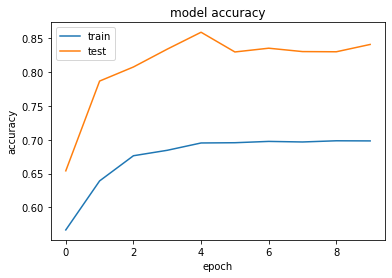

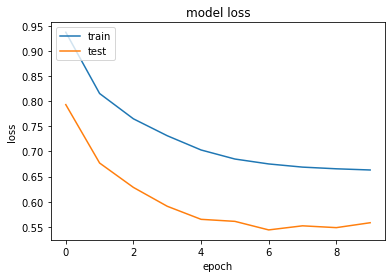

In [47]:
import matplotlib.pyplot as plt 

#accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

#loss 
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

The reason that the plot is like this, is since the training data and validation data don't correspond. Since we altered some points in the data. This is one of the problems we create by using Relabeling

# Predictions

In [48]:
import numpy as np

y_pred_fairval   = np.argmax(fairmodel.predict(X_val), axis=-1)

In [49]:
y_hats_fairval   = pd.DataFrame(data = y_pred_fairval, columns=['y_pred_fairval'], index=x_val.index.copy())

In [50]:
#mergedfair = pd.concat([y_hats_fairtest, y_hats_fairval])

In [51]:
fair_approach_df = pd.merge(x_compas_new, y_hats_fairval, how='left', left_index=True, right_index=True )

In [52]:
display(fair_approach_df)

,Person_ID,Agency_Text,Sex_Code_Text,Ethnic_Code_Text,ScaleSet,AssessmentReason,Language,LegalStatus,CustodyStatus,MaritalStatus,RecSupervisionLevelText,ScoreText,AssessmentType,y_pred_fairval
7,50855,1,1,1,1,1,1,1,1,1,4,High,1,0.0
10,50850,1,2,1,1,1,1,1,1,5,2,Medium,1,NaN
13,50839,1,2,1,1,1,1,1,1,1,1,Low,1,NaN
22,50853,1,1,1,1,1,1,1,1,1,3,High,1,NaN
31,50843,1,1,1,1,1,1,1,1,1,3,Medium,1,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60739,39209,1,1,2,1,1,1,1,1,1,1,Low,1,NaN
8947,53390,1,1,2,1,1,1,1,1,1,2,Medium,1,NaN
11203,54079,1,2,2,1,1,1,1,1,2,1,Low,1,NaN
32890,60353,1,1,2,1,1,1,1,1,1,3,High,1,0.0


In [53]:
cleanup_fair = {"y_pred_fairval": {1.0:0, 2.0:1, 0.0:2}}

fair_approach_df = fair_approach_df.replace(cleanup_fair)
display(fair_approach_df)

,Person_ID,Agency_Text,Sex_Code_Text,Ethnic_Code_Text,ScaleSet,AssessmentReason,Language,LegalStatus,CustodyStatus,MaritalStatus,RecSupervisionLevelText,ScoreText,AssessmentType,y_pred_fairval
7,50855,1,1,1,1,1,1,1,1,1,4,High,1,2.0
10,50850,1,2,1,1,1,1,1,1,5,2,Medium,1,NaN
13,50839,1,2,1,1,1,1,1,1,1,1,Low,1,NaN
22,50853,1,1,1,1,1,1,1,1,1,3,High,1,NaN
31,50843,1,1,1,1,1,1,1,1,1,3,Medium,1,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60739,39209,1,1,2,1,1,1,1,1,1,1,Low,1,NaN
8947,53390,1,1,2,1,1,1,1,1,1,2,Medium,1,NaN
11203,54079,1,2,2,1,1,1,1,1,2,1,Low,1,NaN
32890,60353,1,1,2,1,1,1,1,1,1,3,High,1,2.0


# The predictions

In [54]:
pd.crosstab(fair_approach_df.y_pred_fairval, fair_approach_df.Ethnic_Code_Text)

Ethnic_Code_Text,1,2
y_pred_fairval,,
0.0,1158,1391
1.0,253,258
2.0,346,198


In [55]:
pd.crosstab(y_val, x_val.Ethnic_Code_Text)

Ethnic_Code_Text,1,2
ScoreText,,
High,528,179
Low,728,1285
Medium,501,383


In [56]:
from sklearn.preprocessing import LabelBinarizer

LB = LabelBinarizer()

Y_pred_fairval   = LB.fit_transform(y_pred_fairval)

In [57]:
from sklearn.metrics import multilabel_confusion_matrix

multilabel_confusion_matrix(Y_val, Y_pred_fairval, labels=[1, 2, 0]) #1=low, 2=med, 0=high 
# Calculate by adding everything together for accuracy. don't calculate accuracy per class.

array([[[1009,  582],
        [  46, 1967]],

       [[2673,   47],
        [ 420,  464]],

       [[2867,   30],
        [ 193,  514]]])

# CONFIDENCE INTERVAL ON VAL

In [59]:
from math import sqrt
interval = 1.96 * sqrt( (0.888198298 * (1 - 0.888198298)) / 3604)
print(interval) #so 1% up and 1% down

0.010288281913611181


In [60]:
upper = 0.888198298 + 0.010288281913611181
print(upper)

lower = 0.888198298 - 0.010288281913611181
print(lower)


0.8984865799136112
0.8779100160863889


In [61]:
CI = interval * 100

print(CI)

1.0288281913611181


Given the sample, there is a 95% likelihood that the range 87.7910% to 89.8487% covers the true model accuracy.